<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Applied_Statistics/Poisson_Distribution_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Random in Space or Time: The Poisson  Distribution**
---

**Mass Extinction Example**


<img src = "https://ocean.si.edu/sites/default/files/styles/facebook_twitter_card_image/public/2023-11/93-2698_AncientSeas_SmallMural.jpg.webp?itok=QivCyq98" width = 600 height = 300>

**Image taken from:** [Ocean](https://ocean.si.edu/through-time/ocean-through-time)

Do extinctions occur randomly through the long fossil record of Earth's history, or are there periods in which extinctions rates are unusually high ('mass extinction') compared with background rates?

###**1. Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

- **Poisson Distribution - Mathematical Model**:


\begin{align}
        P(k) = \frac{\mathrm{e}^{-\bar{x}} \, (\bar{x})^{k}}{k!}
  \end{align}

Where:

_k_: _Number of successes_

$\bar{x}$: _Sample mean_




- **Chi-Squared Statistics Calculation**

**Calculate the Chi-Square ($χ^{2}$) Statistics**

\begin{align}
        \frac{(obs_{freq} - exp_{freq})^{2}}{exp_{freq}}.
    \end{align}

**Calculate the Chi-Square ($χ^{2}$) statistic given by:**

\begin{align}
        χ^{2}_{stat} = &\sum_{i=1}^n\frac{(obs_{freq} - exp_{freq})^{2}}{exp_{freq}}.
    \end{align}

###**2. Create the Data Frame**

In [ ]:
Number_Extinctions = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Observed_Freq = [0, 13, 15, 16, 7, 10, 4, 2, 9]
Mass_Extinction = pd.DataFrame({"Number_of_Extinctions": Number_Extinctions,
                                "Observed_Freq": Observed_Freq})
Mass_Extinction

,Number_of_Extinctions,Observed_Freq
0,0,0
1,1,13
2,2,15
3,3,16
4,4,7
5,5,10
6,6,4
7,7,2
8,8,9


###**3. Calculate Associated Probabilities**

In [ ]:
Total_Freq = np.sum(Observed_Freq)
number_array = np.array(Number_Extinctions)
obs_array = np.array(Observed_Freq)
mean = np.sum(np.multiply(number_array, obs_array))/Total_Freq
probabilities = []
#Loop to calculate the associates probabilities
for i in Number_Extinctions:
  probabilities.append((np.exp(-mean)*mean**i)/math.factorial(i))
  i =+ 1

Mass_Extinction['Expected_Freq'] = np.multiply(probabilities, Total_Freq)
Mass_Extinction

,Number_of_Extinctions,Observed_Freq,Expected_Freq
0,0,0,1.934175
1,1,13,7.100457
2,2,15,13.033076
3,3,16,15.948369
4,4,7,14.636825
5,5,10,10.746511
6,6,4,6.575168
7,7,2,3.448255
8,8,9,1.582341


In [ ]:
probabilities

[0.025449666719331705,
 0.09342706598280981,
 0.17148783821844696,
 0.20984695992520483,
 0.19258980861556627,
 0.14140146474669207,
 0.08651536987791028,
 0.04537178232318979,
 0.020820275112121634]

In [ ]:
mean

3.6710526315789473

###**4. Calculate Chi-square statistics**

In [ ]:
Mass_Extinction['Chi_stat'] = ((Mass_Extinction.iloc[:, 1] - Mass_Extinction.iloc[:, 2])**2)/Mass_Extinction.iloc[:, 2]
Mass_Extinction

,Number_of_Extinctions,Observed_Freq,Expected_Freq,Chi_stat
0,0,0,1.934175,1.934175
1,1,13,7.100457,4.901742
2,2,15,13.033076,0.296844
3,3,16,15.948369,0.000167
4,4,7,14.636825,3.984546
5,5,10,10.746511,0.051857
6,6,4,6.575168,1.008566
7,7,2,3.448255,0.608262
8,8,9,1.582341,34.772321


In [ ]:
import scipy.stats
H0 = "The extinction of marine invertebrate species follows a Poisson Distribution"
Ha = "The extinction of marine invertebrate species does not follow a Poisson Distribution"
#find Chi-Square critical value
critical_value = scipy.stats.chi2.ppf(1-.05, df = 9 - 2)
chi_stat = Mass_Extinction['Chi_stat'].sum()
#Conditional to rejct or accet the Null Hypothesis (H0)
if chi_stat < critical_value:
  print(f"Fail to reject the null hypothesis: i.e. {Ha}")
else:
  print(f"Reject the null hypothesis: i.e. {Ha}")

Reject the null hypothesis: i.e. The extinction of marine invertebrate species does not follow a Poisson Distribution


In [ ]:
chi_stat

47.558479956588094

###**5. Histogram**

In [ ]:
freq_array = np.array(Mass_Extinction['Expected_Freq'])

print(freq_array)
print(obs_array)

[ 1.93417467  7.10045701 13.0330757  15.94836895 14.63682545 10.74651132
  6.57516811  3.44825546  1.58234091]
[ 0 13 15 16  7 10  4  2  9]


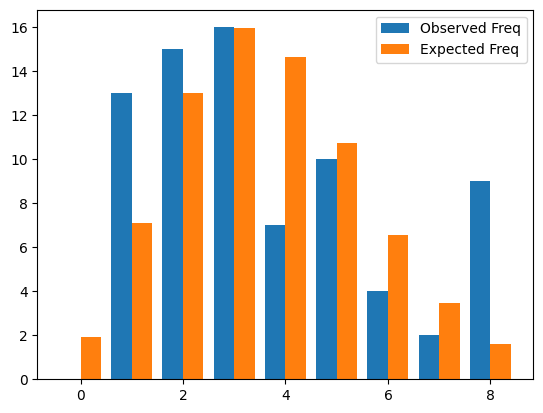

In [ ]:
#X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
freq_array = np.array(Mass_Extinction['Expected_Freq'])
X_axis = np.arange(len(number_array))

plt.bar(X_axis - 0.2, obs_array, 0.4, label = 'Observed Freq')
plt.bar(X_axis + 0.2, freq_array, 0.4, label = 'Expected Freq')
#plt.xticks(X_axis, X)
#plt.xlabel("Groups")
#plt.ylabel("Number of Students")
#plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [ ]:
Mass_Extinction.columns

Index(['Number_of_Extinctions', 'Observed_Freq', 'Expected_Freq', 'Chi_stat'], dtype='object')

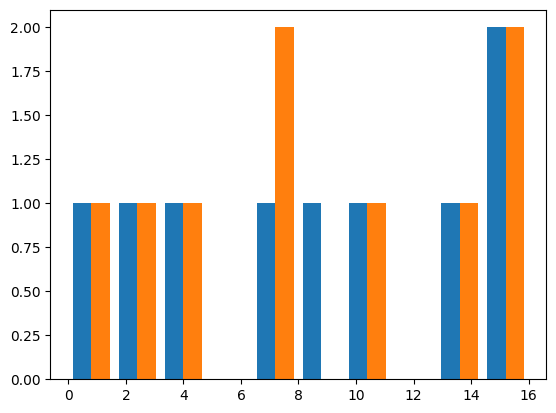

In [ ]:
hist_var = ['Observed_Freq', 'Expected_Freq']
Mass_Hist = Mass_Extinction[hist_var]
plt.hist(Mass_Hist);#, color = "skyblue", lw=0)